In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from tensorflow import keras
from keras import layers,models

In [5]:
test_path="C:\\Users\\eForte\\Desktop\\CNN image classification\\emotions\\test"
train_path="C:\\Users\\eForte\\Desktop\\CNN image classification\\emotions\\train"

In [66]:
classes=['ANGER','DISGUST','FEAR','HAPPINESS','SADNESS','SURPRISE']

In [7]:
train = ImageDataGenerator(rescale = 1/255)
test= ImageDataGenerator(rescale=1/255)

In [8]:
train_set= train.flow_from_directory(train_path,batch_size=64,target_size=(128,128))

Found 11475 images belonging to 6 classes.


In [9]:
test_set= test.flow_from_directory(test_path,batch_size=64,target_size=(128,128))

Found 1438 images belonging to 6 classes.


In [10]:
model = keras.Sequential(
[
    layers.Conv2D(16,(3,3), input_shape=(128,128,3), padding='valid',activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='softmax')
]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [11]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [12]:
model.fit(
    train_set,epochs=20,validation_data=test_set,verbose=2
)

Epoch 1/20
180/180 - 192s - loss: 1.7388 - accuracy: 0.2600 - val_loss: 1.6461 - val_accuracy: 0.3561 - 192s/epoch - 1s/step
Epoch 2/20
180/180 - 177s - loss: 1.5386 - accuracy: 0.3773 - val_loss: 1.4852 - val_accuracy: 0.4284 - 177s/epoch - 981ms/step
Epoch 3/20
180/180 - 178s - loss: 1.3650 - accuracy: 0.4526 - val_loss: 1.2972 - val_accuracy: 0.4701 - 178s/epoch - 990ms/step
Epoch 4/20
180/180 - 172s - loss: 1.2235 - accuracy: 0.5188 - val_loss: 1.1597 - val_accuracy: 0.5570 - 172s/epoch - 953ms/step
Epoch 5/20
180/180 - 160s - loss: 1.1178 - accuracy: 0.5592 - val_loss: 1.1154 - val_accuracy: 0.5570 - 160s/epoch - 886ms/step
Epoch 6/20
180/180 - 154s - loss: 1.0244 - accuracy: 0.6000 - val_loss: 1.0641 - val_accuracy: 0.5911 - 154s/epoch - 856ms/step
Epoch 7/20
180/180 - 155s - loss: 0.9248 - accuracy: 0.6464 - val_loss: 0.9938 - val_accuracy: 0.5960 - 155s/epoch - 861ms/step
Epoch 8/20
180/180 - 155s - loss: 0.8589 - accuracy: 0.6742 - val_loss: 0.8898 - val_accuracy: 0.6627 - 155

In [13]:
model.evaluate(test_set)

23/23 [==============================] - 7s 305ms/step - loss: 0.4926 - accuracy: 0.8227


[0.4926239550113678, 0.8226704001426697]

In [28]:
from PIL import Image

In [68]:
image_path_1='.\\emotions\\test\\Happiness\\myvideo_frames10_jpg.rf.9a813cdfc133d2d48a0e6589a64fc2f7.jpg'
image_path_2='.\\emotions\\test\\Anger\\myvideo_frames60_jpg.rf.234b9213d7c96c4711e2a5c6b3095452.jpg'
image_path_3='.\\emotions\\test\\Sadness\\myvideo_frames0_jpg.rf.3a031dde7838bab327eb5fd9d16abffa.jpg'
image_path_4='.\\emotions\\test\\Surprise\\myvideo_frames435_jpg.rf.6f5577ccec69e23832b193d9e85e484b.jpg'
image_path_5='.\\emotions\\test\\Fear\\myvideo_frames260_jpg.rf.3ccec9aec9b0e50f66c978e1a8a9f70a.jpg'

In [81]:
read_img = cv2.imread(image_path_5)

In [82]:
img_array = Image.fromarray(read_img)
img_resize = img_array.resize((128,128))
print(read_img.size)
print(img_array)
print(img_resize.size)

519168
<PIL.Image.Image image mode=RGB size=416x416 at 0x20F0E55A9D0>
(128, 128)


1/1 [==============================] - 0s 81ms/step
The below picture is showing the emotions of 'HAPPINESS'


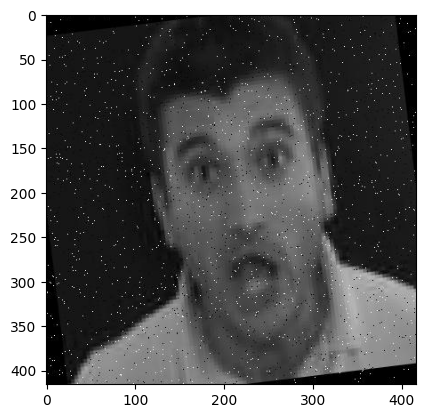

In [83]:
img= np.expand_dims(img_resize,axis=0)
image = np.array(img)
image=image/255
pred= model.predict(image)
res=pred.argmax()
plt.imshow(read_img)
print("The below picture is showing the emotions of '"+classes[res]+"'")

EMOTIONS DATASET 2

In [30]:
test_path2="C:\\Users\\eForte\\Desktop\\CNN image classification\\Emotions_2\\test"
train_path2="C:\\Users\\eForte\\Desktop\\CNN image classification\\Emotions_2\\train"

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [33]:
train_set2=train.flow_from_directory(directory=train_path2,batch_size=70,target_size=(200,200))

Found 28709 images belonging to 7 classes.


In [34]:
test_set2=test.flow_from_directory(directory=test_path2,batch_size=70,target_size=(200,200))

Found 7178 images belonging to 7 classes.


In [45]:
model = keras.Sequential(
[
    layers.Conv2D(16,(3,3), input_shape=(200,200,3), padding='valid',activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(7,activation='softmax')
]
)
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 23, 23, 64)       

In [46]:
model2.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)